# Installation der nötigen Pakete

In [3]:
pip install -r requirements.txt

  Using cached roboflow-1.2.11-py3-none-any.whl.metadata (9.7 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached roboflow-1.2.11-py3-none-any.whl (89 kB)
Using cached idna-3.7-py3-none-any.whl (66 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Roboflow API laden
- hier habe ich meine eigene Lösung indem ich auf eine nicht getrackte .env Datei zugreife
- Es ist möglich hier seine eigene Roboflow API zu setzen

In [2]:
!pip install python-dotenv


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

roboflow_api_key = os.getenv('ROBOFLOW_KEY')
roboflow_username= os.getenv('ROBOFLOW_USERNAME')

DATA_DIR = "data"

api_key = str(roboflow_api_key)

roboflow_username

'Christian Wortmann'

# Herunterladen des Modells
- Nutzung von Inference. 
- Abfruf über die Roboflow API

In [ ]:
from inference import get_model

model = get_model(model_id="football-ball-detection-rejhg/4", api_key= api_key)

# Nutzung eines Bildes als Test
image_url = "https://source.roboflow.com/GGqN5h3Ag5Msh1nOv8tjZvWDZpv1/o85GBBNAkzLmXE95JZdY/original.jpg"

results = model.infer(image_url)[0]
results

results.predictions[0]

[11/11/25 13:14:03] WARNING  Your inference package version 0.59.1 is out of date! Please upgrade to __init__.py:41
                             version 0.60.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

ModelDependencyMissing: Your `inference` configuration does not support PaliGemma model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set PALIGEMMA_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Florence2 model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set FLORENCE2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set QWEN_2_5_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to instal

ObjectDetectionPrediction(x=1500.5, y=559.5, width=17.0, height=17.0, confidence=0.8740402460098267, class_name='ball', class_confidence=None, class_id=0, tracker_id=None, detection_id='7780f0e2-a692-4cb0-a8a8-092d30e45e04', parent_id=None)

# Visualisierungsfunktionen
- Funktion für das Aufrufen eins Bildes anhand der URL
- Visualisierungsfunktion für das Projekt, um Bilder mit den Resultaten zu visualisieren

In [9]:
from io import BytesIO

import requests

from PIL import Image
from PIL.ImageFile import ImageFile

def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content))
    return image

In [ ]:
import supervision as sv

def visualize_detections(
    image, 
    results, 
    show_confidence=True,
    box_thickness=3,
    text_scale=1.5,
    text_thickness=2,
    text_padding=10,
    smart_position=True
):
    # Detections erstellen
    detections = sv.Detections.from_inference(results)
    
    # Labels erstellen
    if show_confidence:
        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]
    else:
        labels = [
            f"{class_name}"
            for class_name in detections['class_name']
        ]
    
    # Annotators initialisieren
    bounding_box_annotator = sv.BoxAnnotator(thickness=box_thickness)
    label_annotator = sv.LabelAnnotator(
        text_scale=text_scale,
        text_thickness=text_thickness,
        text_padding=text_padding,
        smart_position=smart_position
    )
    
    # Bild annotieren
    annotated_image = bounding_box_annotator.annotate(
        scene=image, 
        detections=detections
    )
    annotated_image = label_annotator.annotate(
        scene=annotated_image, 
        detections=detections, 
        labels=labels
    )
    
    return annotated_image



Ausführung der Methoden anhand des Beispiels

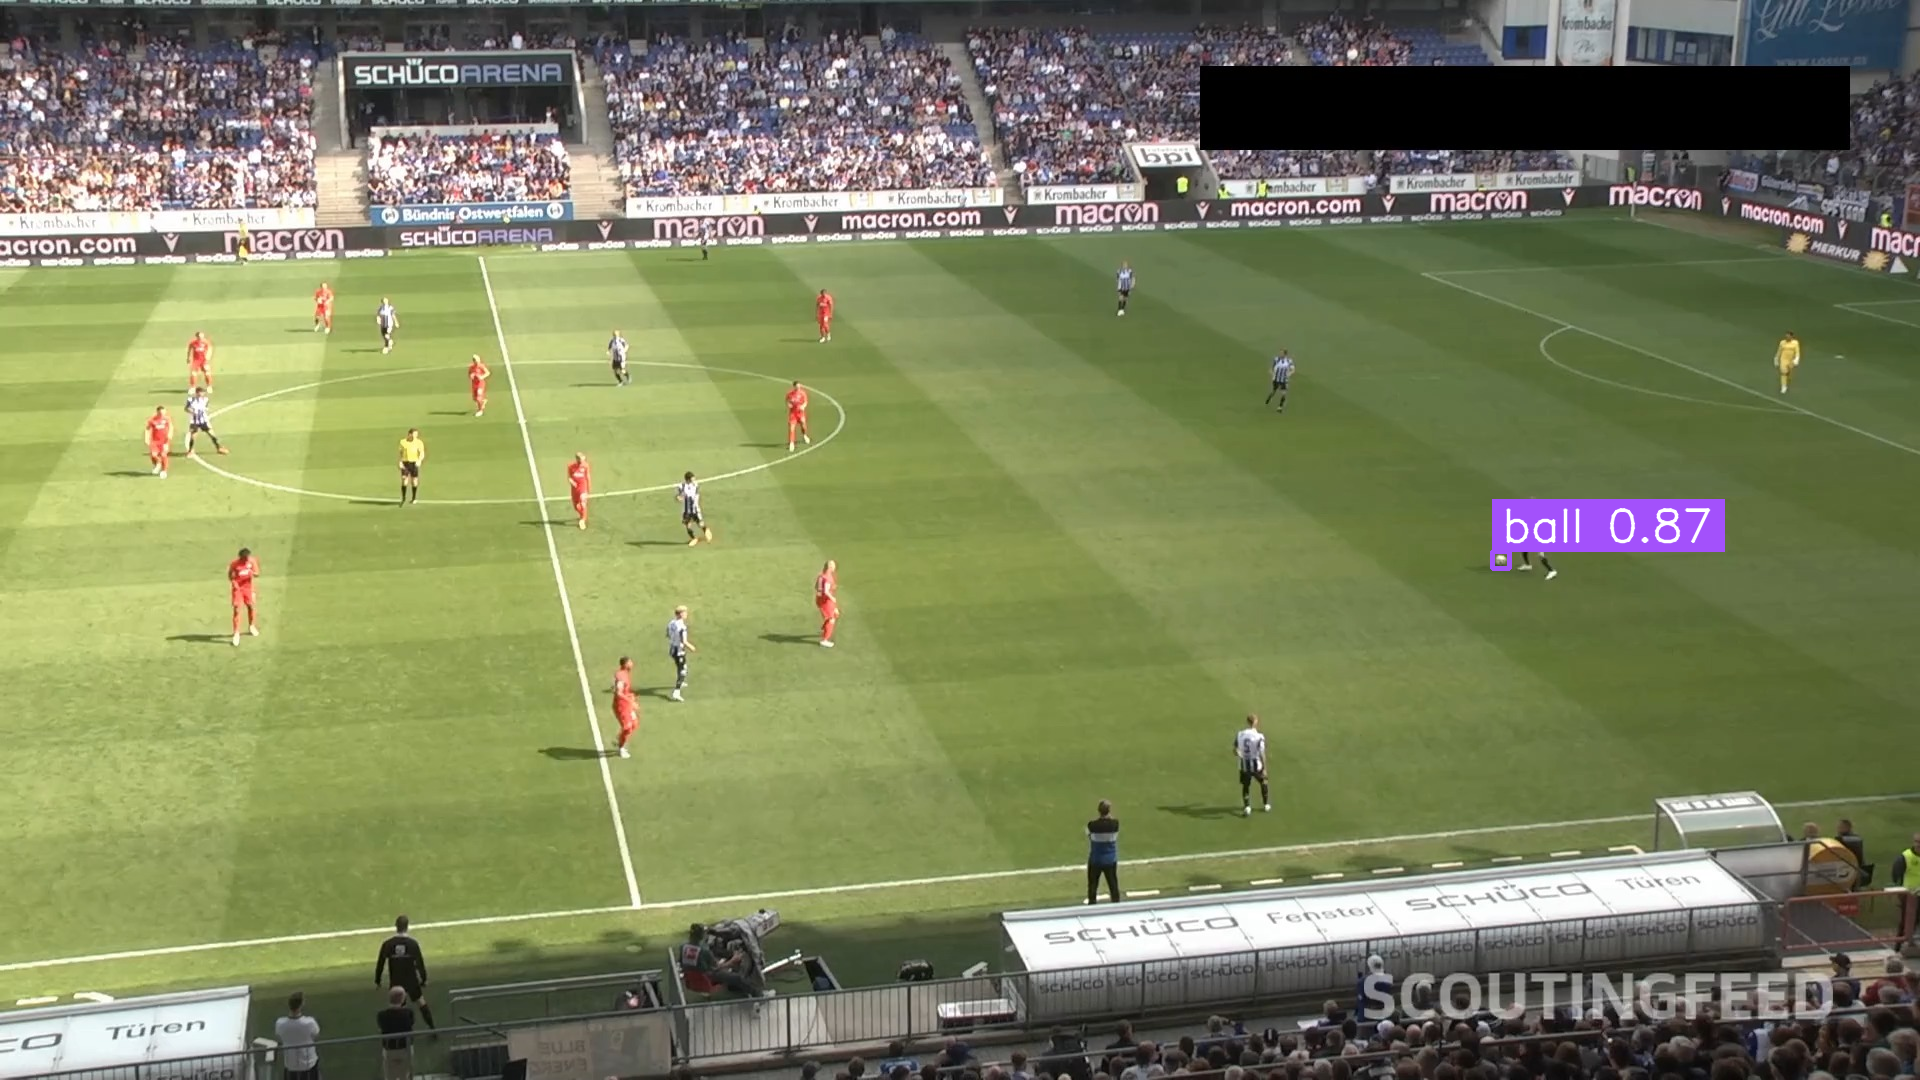

In [10]:
image = load_image_from_url(image_url)

visualize_detections(image=image, results=results, show_confidence=True, smart_position=True)


# Herunterladen der Daten


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-jvuqo").project("football-ball-detection-rejhg")
version = project.version(4)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-ball-detection-4 in yolov8:: 100%|██████████| 9908/9908 [00:16<00:00, 592.00it/s]
